In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Rest of the code to create the DataFrame df...
# Input data
data = {
    'Industry': ['Manufacturing', 'Finance and Insurance', 'Professional Business and Consumer services',
                 'Energy', 'Retail and Wholesale', 'Education', 'Healthcare', 'Government',
                 'Transportation', 'Media'],
    '2022': [24.8, 18.9, 14.6, 10.7, 8.7, 7.3, 5.8, 4.8, 3.9, 0.5],
    '2021': [23.2, 22.4, 12.7, 8.2, 7.3, 2.8, 5.1, 2.8, 4.0, 2.5],
    '2020': [17.7, 23.0, 8.7, 11.1, 10.2, 4.0, 6.6, 7.9, 5.1, 5.7],
    '2019': [8.0, 17.0, 10.0, 6.0, 16.0, 8.0, 3.0, 8.0, 13.0, 10.0],
    '2018': [10.0, 19.0, 12.0, 6.0, 11.0, 6.0, 6.0, 8.0, 13.0, 8.0],
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)
df


# Transpose DataFrame to have years as rows and industries as columns
df = df.set_index('Industry').T

# Convert the index to datetime format
df.index = pd.to_datetime(df.index)

df


Industry,Manufacturing,Finance and Insurance,Professional Business and Consumer services,Energy,Retail and Wholesale,Education,Healthcare,Government,Transportation,Media
2022-01-01,24.8,18.9,14.6,10.7,8.7,7.3,5.8,4.8,3.9,0.5
2021-01-01,23.2,22.4,12.7,8.2,7.3,2.8,5.1,2.8,4.0,2.5
2020-01-01,17.7,23.0,8.7,11.1,10.2,4.0,6.6,7.9,5.1,5.7
2019-01-01,8.0,17.0,10.0,6.0,16.0,8.0,3.0,8.0,13.0,10.0
2018-01-01,10.0,19.0,12.0,6.0,11.0,6.0,6.0,8.0,13.0,8.0


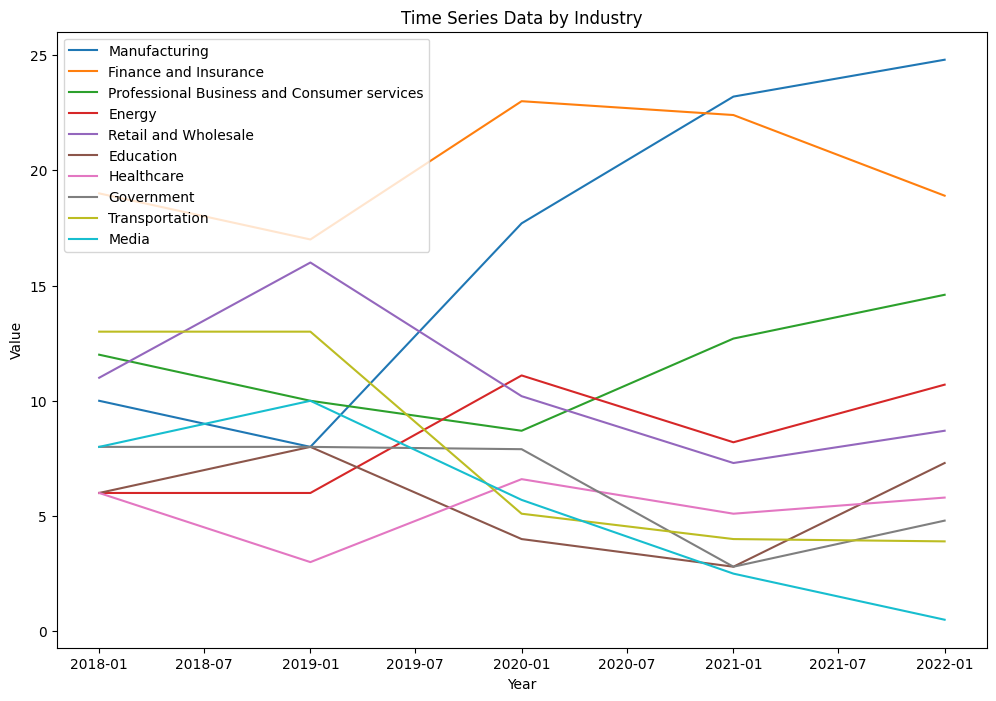

In [5]:
# Plot the time series data
plt.figure(figsize=(12, 8))
for industry in df.columns:
    plt.plot(df.index, df[industry], label=industry)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Data by Industry')
plt.grid(False)
plt.legend()
plt.show()


In [7]:

# Fit the time series model (SARIMAX) for each industry and forecast for 2023
forecasted_values = {}
for industry in df.columns:
    model = sm.tsa.SARIMAX(df[industry], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()

    # Forecast for 2023
    forecast = results.get_forecast(steps=1)
    
    if not forecast.predicted_mean.empty:
        forecasted_value = forecast.predicted_mean.iloc[0]
    else:
        forecasted_value = None  # Or any default value indicating no prediction was made

    # Store the forecasted value for each industry
    forecasted_values[industry] = forecasted_value

# Convert the forecasted values to a DataFrame
forecast_df = pd.DataFrame.from_dict(forecasted_values, orient='index', columns=['Forecasted Value for 2023'])

print(forecast_df)
forecast_df.to_excel("forecast_df.xlsx", index=False)


c:\Users\vivian\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\vivian\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vivian\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\vivian\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates

                                             Forecasted Value for 2023
Manufacturing                                                     10.0
Finance and Insurance                                             19.0
Professional Business and Consumer services                       12.0
Energy                                                             6.0
Retail and Wholesale                                              11.0
Education                                                          6.0
Healthcare                                                         6.0
Government                                                         8.0
Transportation                                                    13.0
Media                                                              8.0


ModuleNotFoundError: No module named 'openpyxl'

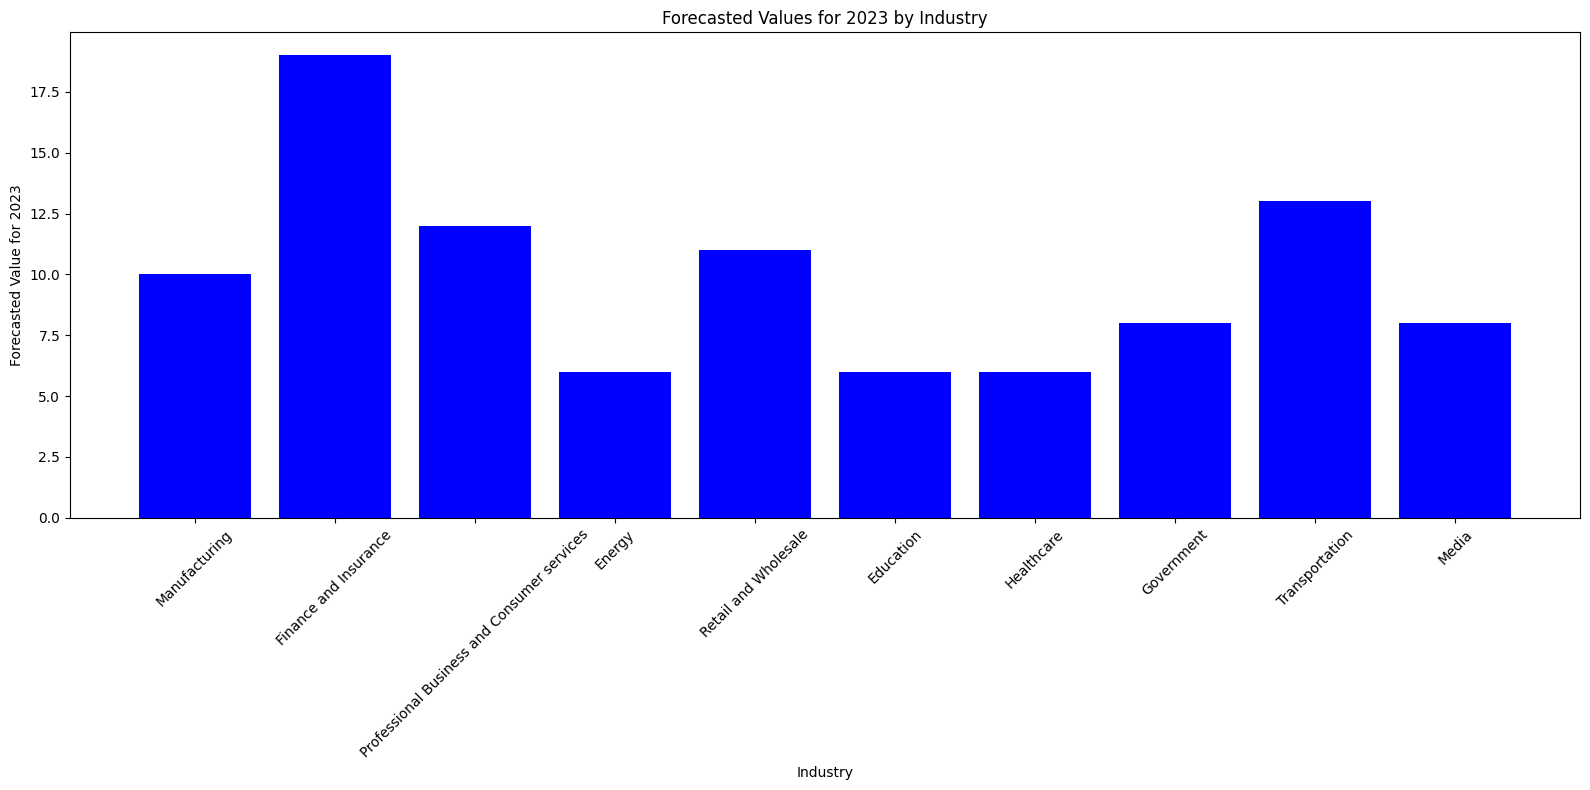

In [ ]:
# Plot the forecasted values
plt.figure(figsize=(16, 8))
plt.bar(forecast_df.index, forecast_df['Forecasted Value for 2023'], color='blue')
plt.xlabel('Industry')
plt.ylabel('Forecasted Value for 2023')
plt.title('Forecasted Values for 2023 by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Actual values for 2022
actual_values_2022 = [24.8, 18.9, 14.6, 10.7, 8.7, 7.3, 5.8, 4.8, 3.9, 0.5]

# Forecasted values for 2023
forecasted_values_2023 = [10.0, 19.0, 12.0, 6.0, 11.0, 6.0, 6.0, 8.0, 13.0, 8.0]

# Calculate Mean Absolute Error (MAE)
n = len(actual_values_2022)
mae = sum(abs(actual - forecast) for actual, forecast in zip(actual_values_2022, actual_values_2022)) / n

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.0
